In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle

from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn.svm import SVC 
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import confusion_matrix 

df=pd.read_csv('MRec.csv')
df.head()

,Age,Gender,Mood,Genre,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,18,F,Happy,Rock,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18,F,Gloomy,Instrumental,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18,F,Stressed,Pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18,F,Relaxing,Pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18,F,Energetic,Hiphop,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
#Checking number of unique values and wrong entries like symbols -,?,#,*,etc.
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))
df.describe()

#Checking for null values to fill
print("Number of null values:")
print(df.isnull().sum())

Age : [18 19 20 21 22 23 24 25 27 28 29 30 31 32 33 34 36 37 39 42 43 45 47 49
 55]
Gender : ['F' 'M']
Mood : ['Happy' 'Gloomy' 'Stressed' 'Relaxing' 'Energetic']
Genre : ['Rock' 'Instrumental' 'Pop' 'Hiphop' 'EDM' 'Indie/Acoustic' 'Country'
 'Blues']
Unnamed: 4 : [nan]
Unnamed: 5 : [nan]
Unnamed: 6 : [nan]
Unnamed: 7 : [nan]
Unnamed: 8 : [nan]
Unnamed: 9 : [nan]
Unnamed: 10 : [nan]
Number of null values:
Age              0
Gender           0
Mood             0
Genre            0
Unnamed: 4     375
Unnamed: 5     375
Unnamed: 6     375
Unnamed: 7     375
Unnamed: 8     375
Unnamed: 9     375
Unnamed: 10    375
dtype: int64


In [141]:
#Replacing categorical data with integer values

df['Gender'].replace(['M','F'],[0,1], inplace=True)
df['Mood'].replace(['Happy','Gloomy','Stressed','Relaxing','Energetic'],[1,2,3,4,5], inplace=True)

df.head(7)


,Age,Gender,Mood,Genre,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,18,1,1,Rock,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18,1,2,Instrumental,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18,1,3,Pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18,1,4,Pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18,1,5,Hiphop,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,19,0,1,Pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,19,0,2,EDM,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
#Dropping empty columns
df = df.dropna(axis='columns', how='all')

print("Data after dropping empty columns:")
print(df.shape)

Data after dropping empty columns:
(375, 4)


In [143]:
#Replacing NaN instances with mean values

columns=df[['Age','Gender']]
for col in columns:
    df[col]=pd.to_numeric(df[col])
    df[col].fillna(df[col].mean(), inplace=True)
df.head()

,Age,Gender,Mood,Genre
0,18,1,1,Rock
1,18,1,2,Instrumental
2,18,1,3,Pop
3,18,1,4,Pop
4,18,1,5,Hiphop


In [6]:
#Checking for null values again
df.isnull().sum()

Age       0
Gender    0
Mood      0
Genre     0
dtype: int64

Text(0.5, 1.0, 'Count of demographics in dataset:')

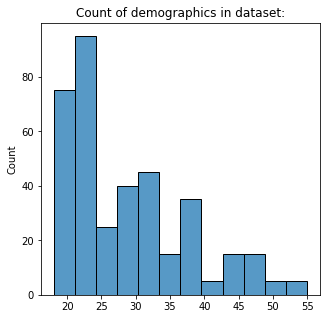

In [7]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.histplot(x = df.Age.values, data=df)
ax.set_title("Count of demographics in dataset:")

<AxesSubplot:xlabel='Age', ylabel='Genre'>

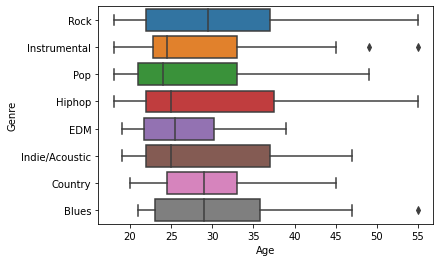

In [8]:
sns.boxplot(x='Age',y='Genre',data=df)

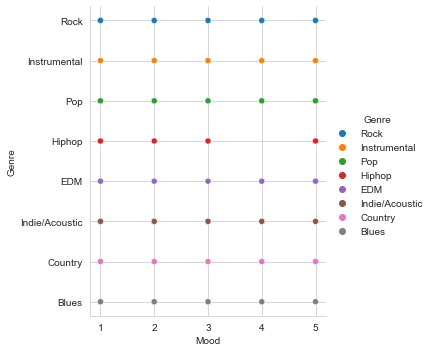

In [9]:
sns.set_style("whitegrid");
sns.relplot(x='Mood',y='Genre',hue='Genre', data=df)
plt.show();

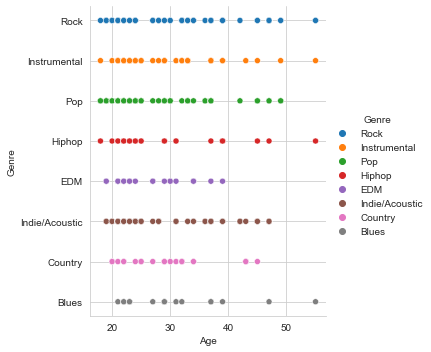

In [10]:
sns.set_style("whitegrid");
sns.relplot(x='Age',y='Genre',hue='Genre', data=df)
plt.show();

In [158]:
#Model testing
X=df[['Age','Gender','Mood']]
y=df['Genre']
X_train,X_test,y_train,y_test=train_test_split(X.values,y,test_size = 0.25, random_state = 1000)
model=DecisionTreeClassifier()
model=model.fit(X_train, y_train)

predictions=model.predict([ [21,1,1],[22,0,4],[24,0,1],[31,0,4],[22,0,5] ])
predictions

array(['Pop', 'Instrumental', 'Pop', 'Indie/Acoustic', 'Rock'],
      dtype=object)

In [159]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1000) 

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

from sklearn.svm import SVC 
classifier = SVC(kernel = 'linear', random_state = 0) 
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test) 

from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred)

from joblib import dump, load

# create an iterator object with write permission
with open('C:/Users/User/Music_Recommendation_App/MusicApp/music_predict.sav', 'wb') as files:
   pickle.dump(model, files)

In [160]:
# load saved model
#m_jlib = joblib.load('C:/Users/User/Music_Recommendation_App/MusicApp/music_predict.joblib')
with open('C:/Users/User/Music_Recommendation_App/MusicApp/music_predict.sav' , 'rb') as f:
    lr = pickle.load(f)
lr.predict([[21,1,1],[22,0,4],[29,0,5],[31,0,4],[22,0,5]])


array(['Pop', 'Instrumental', 'Hiphop', 'Indie/Acoustic', 'Rock'],
      dtype=object)

<AxesSubplot:>

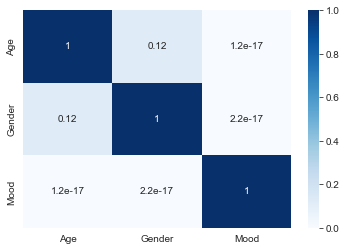

In [85]:
#Relationship analysis
sns.heatmap(df.corr(),cbar=True, annot=True, cmap='Blues')

In [15]:
#Replacing categorical data with integer values
#df['Genre'].replace(['Pop','Rock','Indie/Acoustic','Instrumental','EDM','Blues','Hiphop','Country'],[10,20,30,40,50,60,70,80], inplace=True)
#df.head(7)

#sns.pairplot(df)
#Outliers
#q1=df.quantile(0.25)
#q3=df.quantile(0.75)
#iqr=q3-q1

#print(   (df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr))  )